# Computational Methods in Economics

## Tutorial 2e - Object-Oriented Programming

In [1]:
# Author: Alex Schmitt (schmitt@ifo.de)

import datetime
print('Last update: ' + str(datetime.datetime.today()))

Last update: 2018-12-20 14:31:16.955254


In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

import scipy.optimize

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

from turtle import *
from shapes import *
from random import randint
# from mobilechelonian import Turtle

import webbrowser

## This Lecture

- [Introduction](#intro)
- [Writing Your Own Class](#own)
- [Defining an Economic Model as a Class](#df)

----------------------------------------------------------------------------------------------------------------------

### Introduction

In the context of scikit-learn, we have encountered and used examples of *classes*. Recall the notation, e.g. for the **LinearRegression()** class:

In [33]:
## call instance of LinearRegression()
lr = LinearRegression()
## use a method -> not applicable here, since we do not have data 
# lr.fit(X, y)
## check attributes
# lr.coef_

In the example above, **LinearRegression()** is the name of the class; calling the first line defines an *instance* of this class under the name **lr**. 

You can think of a class like the *blueprint*, e.g. for a house; that is, a recipe that tells you how to build, what goes where and so on. In this analogy, an instance would then be an actual house, built following the blueprint.

Classes are a very important concept in the context of *object-oriented programming (OOP)*. 

From Wikipedia: "OOP is a programming paradigm based on the concept of "objects", which may contain data, in the form of fields, often known as *attributes*; and code, in the form of procedures, often known as *methods*. A feature of objects is that an object's procedures can access and often modify the data fields of the object with which they are associated (*objects have a notion of "this" or "self"*). 

[...] There is significant diversity of OOP languages, but the most popular ones are *class-based*, meaning that objects are instances of classes, which typically also determine their type."

We have encountered a number of variable types that fit this description of objects. For example, consider a NumPy array: it obviously contains data, and it has attributes (e.g. **.shape**) and methods (e.g. **.mean()**) associated with it.

There are also methods that can directly modify the attributes of a NumPy attributes, e.g. **.resize()**.

In [48]:
A = np.array([[1, 2], [3, 4]])
print(A.shape)
A.resize((4,1))
print(A.shape)
print(A)

(2, 2)
(4, 1)
[[1]
 [2]
 [3]
 [4]]


In this sense, we have used OOP since the start of this course! The new feature in this lecture is that Python lets you write your own classes, and hence define your own kind of objects.

We will first look at a simple but fun example to get an idea how it works. We then turn to a more useful example and discuss why and when writing your own classes may be a good idea.

----------------------------------------------------------------------------------------------------------------------
<a id = 'own'></a>

### Writing your own class

Below, we will define a class called **Santa**. Here, we import it from the **christmas** module to illustrate its features. 

In [3]:
from christmas import Santa

First, we create an instance of the class, and provide it with four arguments: the color (a string) of Santa's hat, the number of gifts he's bringing, his degree of "jolliness" and his favorite Christmas song (a string). The syntax below indicates that the latter two are *optional* arguments, i.e. have default values.    

In [4]:
santa_claus = Santa("red", 4, jolly = 1, favorite_song = 'https://www.youtube.com/watch?v=76WFkKp8Tjs')
type(santa_claus)

christmas.Santa

Each instance of the Santa class has a number of *attributes*, that we can access by the name of the attribute, attached to the name of the instance by a dot (like a method, bit without parentheses). For example, we can print the number of gifts and how jolly **santa_claus** is:

In [5]:
print( santa_claus.num_of_gifts )

4


In [6]:
print( santa_claus.jolly )

1


Next, the class has a number of methods, for example to pack more gifts. Note that this will change the **num_of_gifts** attribute of the instance:

In [7]:
santa_claus.add_gift(2)
print( santa_claus.num_of_gifts )

5


Similarly, Santa also gives gifts, which increases his level of jolliness:

In [8]:
santa_claus.give_gift()
print( santa_claus.num_of_gifts )
print( santa_claus.jolly )

4
2


The next method asks a Santa to be jolly: 

In [9]:
santa_claus.be_jolly()

Ho! 
Ho! 
Merry Christmas!


We can also directly change an attribute level:

In [14]:
santa_claus.jolly = 3
santa_claus.be_jolly()

Ho! 
Ho! 
Ho! 
Merry Christmas!


Next, let's play Santa's favorite christmas song, and draw its head:

In [10]:
santa_claus.play_song()

In [11]:
santa_claus.draw_hat()

The implementation of this class with these methods and attributes is given below:

Note the following:

- Every class definition starts with the keyword **class**, followed by the name of the class. You would expect that the arguments (e.g. the color in the example above) follows in the parentheses, but this is not the case. For now, we leave the parentheses empty. 

- The second mandatory element for a class is the **__init__** function. As the name indicates, this "initializes" the instances. 

- The remaining elements in the class definition are the methods used above. Note that they all take **self** as argument, in addition to other arguments (e.g. the number of new gifts). The methods essentially work like functions, i.e. have **return** statements if something is to be returned. Moreover, you can access and change the values of the attributes within a method.

----------------------------------------------------------------------------------------------------------------------
<a id = 'ngm'></a>

### Defining an economic model as a class

In previous lectures, we have used the neoclassical growth model as an example for rootfinding (lecture 4) and optimization (lecture 5). Compare the lecture notes for a refresher on the model structure. 

Consider different instances of the NGM. What pieces of data that may be different between these instances? You may see differences in

- parameter values (e.g., running the model for different values for the discount factor $\beta$);
- functional forms (e.g. a Cobb-Douglas production function vs. a CES);
- dimensionality of the problem, i.e. how many choice variables are they in addition to investment?
- whether or not you want to include a continuation value when solving it.


Now, consider what different versions of the model have in common, given these differences:

- the objective function is always the sum of discounted per-period utility functions, which at the very least should be functions of consumption;
- there is a resource constraint that relates production, consumption and investment in capital;
- if we substitute the resource constraint, per-period utility is a function of next-period capital, plus possibly more (labor, pollution, etc.)
- solving them involves solving a minimization problem for the transition phase.

Based on these considerations, we can write a class that takes as inputs the (potentially) different data - parameters and functional forms - but contains the common features, in particular objective function and routines for solving for the steady state and the solution vectors over time. 

In [12]:
class NGM():
    
    def __init__(self, x, utility, utility_ss, production, parameters, num_of_inputs):
        ## the first input is the solution vector, i.e. initially the initial guess
        self.x = x
        ## the next two inputs are functions
        self.util = utility
        self.util_ss = utility_ss
        self.prod = production
        ## then parameters; we assume that the input is a dictionary
        self.params = parameters
        self.num = num_of_inputs
        
        ## derived attributes
        self.T = int( len(self.x) / self.num )
        
        
    def objective(self, z):
        """
        Objective function: lifetime utility
        """
        return - ( self.params['beta']**(np.array(range(self.T))) @ self.util( z , self.prod, self.params ) 
                   + (self.params['beta']**self.T/(1 - self.params['beta'])) *  
                      self.util_ss( np.array( [z[self.T-1], z[2*self.T-1]] ), self.prod, self.params) )
    
    
    def solve_transition(self):
        res = scipy.optimize.minimize(self.objective, self.x, method = 'BFGS', tol = 1e-6)
        print(res)
#         print(res.success)
        self.x = res.x
        self.success = res.success
        print(res.message)
        
    
#     def graph(self):
#         fig, ax = plt.subplots(2,1)
#         ax[0].plot(self.kp)
#         ax[1].plot(self.other)
#         ax[0].hlines(1, 0, T)
#         ax[1].hlines(1, 0, T)
    

We use the same example as in lecture 5a.

In [13]:
params = dict()
params['beta'] = 0.8      # discount factor
params['nu'] = 2       # risk-aversion coefficient for consumption
params['eta'] = 1         # elasticity parameter for labor supply
## production
params['alpha'] = 0.25
params['delta'] = 0.1
## derived
params['A'] = (1 - params['beta'] * (1 - params['delta']))/(params['alpha']*params['beta'])  # normalization parameter for production function => steady state k = 1
params['B'] = (1 - params['alpha']) * params['A'] * (params['A'] - params['delta'])**(-params['nu'])   # normalization parameter for utility function => steady state h = 1
## initial capital stock
params['k0'] = 0.8

In [14]:
T = 30
## set initial guess    
# x0 = np.concatenate([np.ones(T), np.ones(T)])
x0 = 1e-6 * np.ones( 2* T)

In [ ]:
def choice1(x, params):
    kp = np.exp( x[:T] )
    k = np.insert(kp[:T-1], 0, params['k0'])
    h = np.exp( x[T:] )
    
    return kp, k, h

In [15]:
def cd(x, params):
    """
    Evaluates the Cobb-Douglas function with coefficient alpha and shift parameter A, for two inputs (x)
    """
    T = int(len(x)/2)
    
    kp = np.exp( x[:T] )
    k = np.insert(kp[:T-1], 0, params['k0'])
    h = np.exp( x[T:] )
    
    return params['A'] * k**params['alpha'] * h**(1 - params['alpha'] )

def u(x, prod, params):
    """
    Utility function
    """
    T = int(len(x)/2)
    
    kp = np.exp( x[:T] )
    k = np.insert(kp[:T-1], 0, params['k0'])
    h = np.exp( x[T:] )
    c = prod(x, params) + (1 - params['delta']) * k - kp
    
    return c**(1 - params['nu'])/(1 -  params['nu']) -  params['B'] * h**(1 + params['eta'])/(1 +  params['eta'])

def u_ss(x, prod, params):
    """
    Utility function
    """
    T = int(len(x)/2)
    
    kp = np.exp( x[:T] )
    h = np.exp( x[T:] )
    c = params['A'] * kp**params['alpha'] * h**(1 - params['alpha'] ) - params['delta'] * kp 
    
    return c**(1 - params['nu'])/(1 -  params['nu']) -  params['B'] * h**(1 + params['eta'])/(1 +  params['eta'])

In [16]:
ngm1 = NGM(x0, u, u_ss, cd, params, 2)

In [17]:
ngm1.objective(x0)

array([ 5.58799686])

In [18]:
ngm1.solve_transition()
print(ngm1.success)

      fun: 5.560590689986769
 hess_inv: array([[  1.05954160e+00,   6.96031406e-01,   4.74853252e-01, ...,
         -1.50360972e-04,  -4.79389156e-04,   3.96053802e-04],
       [  6.96031406e-01,   1.73116492e+00,   1.18691985e+00, ...,
         -6.06608807e-05,  -3.98520002e-04,  -1.18522674e-03],
       [  4.74853252e-01,   1.18691985e+00,   2.31210081e+00, ...,
         -2.31967311e-04,  -7.03560195e-04,  -4.54656268e-04],
       ..., 
       [ -1.50360972e-04,  -6.06608807e-05,  -2.31967311e-04, ...,
          9.99999776e-01,   3.41620658e-07,   3.08133503e-07],
       [ -4.79389156e-04,  -3.98520002e-04,  -7.03560195e-04, ...,
          3.41620658e-07,   1.00002308e+00,   7.53606284e-07],
       [  3.96053802e-04,  -1.18522674e-03,  -4.54656268e-04, ...,
          3.08133503e-07,   7.53606284e-07,   1.00057028e+00]])
      jac: array([  0.00000000e+00,   5.96046448e-08,   0.00000000e+00,
         0.00000000e+00,  -5.96046448e-08,   0.00000000e+00,
         1.19209290e-07,   1.1920

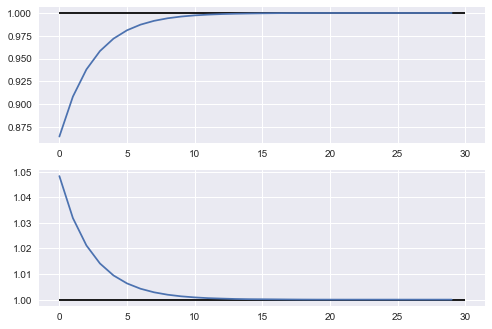

In [229]:
ngm1.graph()